<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dependencies" data-toc-modified-id="Dependencies-1">Dependencies</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2">Functions</a></span></li><li><span><a href="#Paths" data-toc-modified-id="Paths-3">Paths</a></span></li><li><span><a href="#Main" data-toc-modified-id="Main-4">Main</a></span></li></ul></div>

# Dependencies

In [1]:
options(scipen = 999)

In [2]:
library(survival)
library(survminer)
library(forestmodel)

Loading required package: ggplot2

Loading required package: ggpubr



# Functions

In [3]:
source("~/OneDrive - UHN/R_src//ggplot2_theme.R")
source("~/OneDrive - UHN/R_src//color_schemes.R")

# Paths

In [4]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Plots/"
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Manifests/"

# Main

In [5]:
load(file = file.path(datapath,"TME_clusters/IPD_estimate_metadata_IC.RData"))

In [6]:
table(metadata_IC$immune_cluster)


 C1  C2  C3  C4 
 90 279 393 163 

In [7]:
manifest <- read.csv(file = paste0(datapath, "HandE/HandE_Manifestfile_4Derek.csv"),
                    header = T, stringsAsFactors = F, row.names = 1)

In [8]:
scores <- read.table(file = paste0(datapath, "HandE/cbtn_til_score_summary.csv"), se = "\t",
                    header = T, stringsAsFactors = F)

In [9]:
tail(manifest,100)

,File.ID,Latest.DID,File.Name,Data.Type,File.Format,Experiment.Strategy,Participants.ID,Proband,Family.Id,Sample.External.ID,Aliquot.External.ID
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
5430,GF_W6FWVZXK,bd13ba95-fd7b-45e6-9e28-d21f9f278e9d,9190_HandE_B1.svs,Histology Images,svs,--,PT_DB800CE1,Yes,--,7316-261,--
5435,GF_W7RE16XV,9cff6d72-d774-4e9c-b8b0-0658f96a3a59,29416_HandE_B2.svs,Histology Images,svs,--,PT_66XN3MT1,Yes,--,7316-936,7316-936
5445,GF_W96WZ4KF,ba939f2f-efd5-4696-9807-ffe3f2774fdc,18653_HandE.svs,Histology Images,svs,--,PT_RSDTCFDA,Yes,--,7316-204,7316-204
5450,GF_WAQQFN4T,4cf7a0f0-14e2-455e-8631-d52abc9fb6a2,23507_HandE.svs,Histology Images,svs,--,PT_AYZA2WCW,Yes,--,7316-197,7316-197
5456,GF_WB7MS6EE,a6c3c027-9186-4994-9571-fd14e7341177,28730_HandE_A2.svs,Histology Images,svs,--,PT_39HBKSGG,Yes,--,7316-908,7316-908
5463,GF_WCM6G10T,e603dffa-19a5-41e9-acee-a546650bbf37,3403_HandE_FS.svs,Histology Images,svs,--,PT_1ZAWNGWT,Yes,--,7316-3345,7316-3345
5465,GF_WCZNCP35,a9be2b42-f3fd-4bd3-8788-0166eba4d468,27898_HandE.svs,Histology Images,svs,--,PT_C95KPXSW,Yes,--,7316-869,7316-869
5471,GF_WDCH30NC,7c877799-850e-44d6-977c-93af8c5fc87b,28423_HandE_B3.svs,Histology Images,svs,--,PT_67R1AF5R,Yes,--,7316-889,7316-889
5473,GF_WDHJ7KGT,3bb33a94-7c37-4399-bb66-3b84f19e1bce,23180_HandE_(D).svs,Histology Images,svs,--,PT_3VCS1PPF,Yes,--,7316-198,7316-198


In [10]:
manifest$Derekssampleid <- gsub(".svs", "",manifest$File.Name)

In [11]:
manifest$Derekssampleid <- gsub("[)]","", manifest$Derekssampleid)
manifest$Derekssampleid <- gsub("[(]","", manifest$Derekssampleid)

In [12]:
scores$sampleId <- gsub("%2528","", scores$sampleId)
scores$sampleId <- gsub("%2529","", scores$sampleId)

In [13]:
scores$sample_id <- manifest$Sample.External.ID[match(scores$sampleId, manifest$Derekssampleid)]

In [14]:
head(scores)

,sampleId,nPatch,nTissuePatch,tilScoreMean,tilScoreThresh,tilEntropyMean,sample_id
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>
1,10454_HandE_B,58080,22744,0.07698901,0.013761871,0.3073516,7316-275
2,10457_HandE_C,67640,16176,0.15894334,0.029611771,0.5355318,7316-275
3,1230_HandE_FS,10560,793,0.03900349,0.001261034,0.1885922,7316-1461
4,1233_HandE_B,99000,17260,0.09525006,0.024913094,0.3348498,7316-1461
5,12849_HandE_A,105101,15009,0.31842333,0.265440736,0.6144974,7316-288
6,12850_HandE_A,63700,13256,0.16812727,0.061330718,0.5092051,7316-288


In [15]:
write.csv(scores, file = paste0(datapath,"forGangesh/HandE_scores_CBTN.csv"), row.names = F)

In [16]:
HE_manifest <- merge(scores[!duplicated(scores$sample_id),], metadata_IC, by = "sample_id")

In [17]:
head(HE_manifest)

,sample_id,sampleId,nPatch,nTissuePatch,tilScoreMean,tilScoreThresh,tilEntropyMean,aliquot_id,StromalScore,ImmuneScore,⋯,recurrence,disease_type,primary_site,group,cohort,sample_type,age_class,tumour_subtype,CRI_cluster,immune_cluster
,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,7316-10,18845_HandE,110520,60251,0.10870980,0.031435163,0.3776549,717108,948.222412,1027.2452,⋯,1,Neurofibroma/Plexiform,Spinal Cord- Lumbar/Thecal Sac,CBTN,NFB,Initial CNS Tumor,Young adults,NA,Inflammatory,C2
2,7316-100,18605_HandE,183600,58832,0.06401132,0.018544330,0.2395903,601598,2.772548,407.5385,⋯,0,Craniopharyngioma,Suprasellar/Hypothalamic/Pituitary,CBTN,CPH,Initial CNS Tumor,Children,NA,Inflammatory,C2
3,7316-101,18609_HandE_-_BLOCK_A1,134520,42971,0.06795075,0.003607084,0.2823307,588338,-844.579058,-289.5254,⋯,0,Ganglioglioma,Temporal Lobe,CBTN,pedLGG,Initial CNS Tumor,Children,BRAF_WT,Immunologically quiet,C4
4,7316-1075,29601_HandE,183920,53314,0.06751425,0.024702705,0.2222025,588351,-186.469439,669.7261,⋯,0,Craniopharyngioma,Suprasellar/Hypothalamic/Pituitary,CBTN,CPH,Initial CNS Tumor,NA,NA,Lymphocyte depleted,C2
5,7316-1077,29596_HandE,217189,87812,0.04858833,0.011251310,0.1909576,731885,-680.648423,-475.4882,⋯,0,Ganglioglioma,Occipital Lobe,CBTN,pedLGG,Initial CNS Tumor,Children,BRAF_WT,Inflammatory,C3
6,7316-1078,29590_HandE_A1,65247,12340,0.03834332,0.003808752,0.1732243,588352,-823.480878,-630.5107,⋯,0,Ependymoma,Cerebellum/Posterior Fossa,CBTN,EPN,Initial CNS Tumor,Children,EPN_Fossa,Lymphocyte depleted,C3


In [18]:
write.csv(HE_manifest, file = "~/Downloads/HE_manifest_4Derek.csv", row.names = F)

In [19]:
dim(HE_manifest)

[1] 434  30

In [20]:
table(HE_manifest$immune_cluster)


 C1  C2  C3  C4 
 52 139 172  71 

In [21]:
tapply(HE_manifest$tilScoreMean, HE_manifest$immune_cluster, summary)

$C1
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.02152 0.07202 0.09544 0.11323 0.14902 0.24185 

$C2
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.007842 0.053083 0.084651 0.094461 0.115640 0.480338 

$C3
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.007275 0.057450 0.097361 0.157262 0.188369 0.698635 

$C4
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.01037 0.07965 0.14692 0.21469 0.31517 0.66391 


In [22]:
tapply(HE_manifest$tilScoreMean, HE_manifest$cohort, summary)

$ATRT
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.02745 0.08234 0.12455 0.17701 0.26027 0.49062 

$CP
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.02935 0.06461 0.07715 0.08250 0.10065 0.16648 

$CPH
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.04833 0.06296 0.09458 0.11106 0.13182 0.24185 

$EPN
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.01704 0.06146 0.08832 0.11158 0.14903 0.39740 

$ETMR
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.03884 0.11966 0.20048 0.20048 0.28131 0.36213 

$MB
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.06694 0.26222 0.36447 0.37142 0.48358 0.69864 

$MNG
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0390  0.1199  0.1533  0.1617  0.1818  0.3920 

$NFB
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.06542 0.08882 0.11272 0.12342 0.13486 0.21044 

$pedHGG
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.03214 0.06416 0.10132 0.13080 0.17184 0.42938 

$pedLGG
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.

In [23]:
pairwise.wilcox.test(HE_manifest$tilScoreMean, 
                     HE_manifest$immune_cluster,
                     p.adjust = "none")


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  HE_manifest$tilScoreMean and HE_manifest$immune_cluster 

   C1     C2        C3    
C2 0.0209 -         -     
C3 0.8480 0.0076    -     
C4 0.0042 0.0000012 0.0088

P value adjustment method: none 

In [24]:
table(HE_manifest$cohort[ HE_manifest$immune_cluster == "C4"])


  ATRT     CP    EPN   ETMR     MB pedHGG pedLGG 
     5      1      5      1     32      3     24 

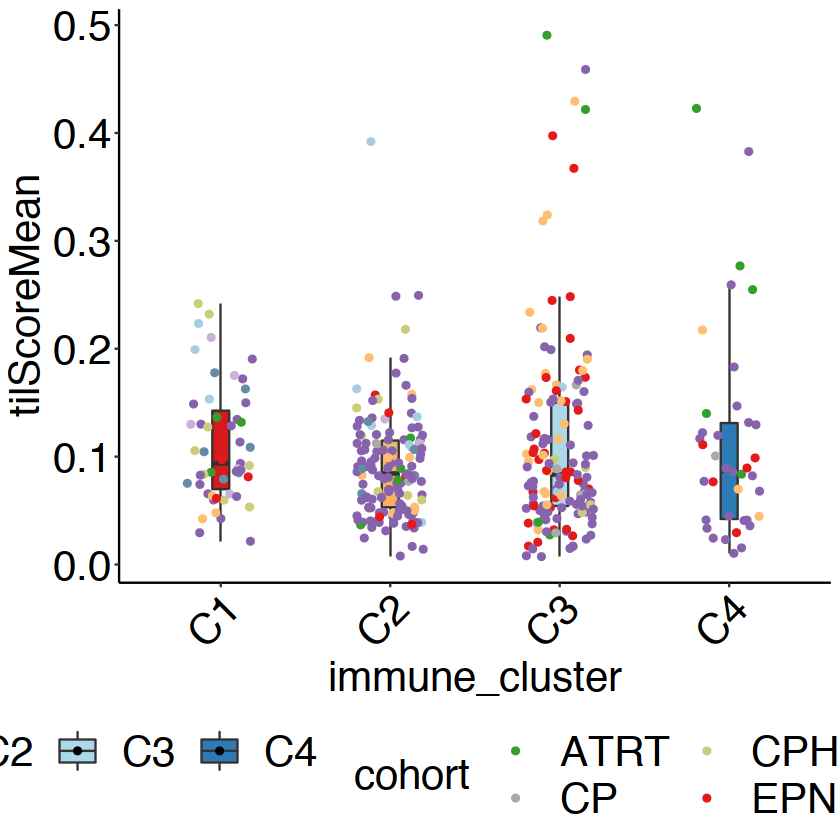

In [31]:
heplot <- ggplot(data = HE_manifest[!HE_manifest$cohort %in% c("MB", "ETMR"),], 
                 aes(x = immune_cluster, y = tilScoreMean, fill = immune_cluster)) + 
 geom_boxplot(width = 0.1, outlier.colour = NA) + myaxis + myplot +
geom_jitter(aes(color = cohort), width = 0.2) +
scale_fill_manual(values = cluster_col) +scale_color_manual(values = cohort_col) +
theme(legend.position = "bottom") 
heplot

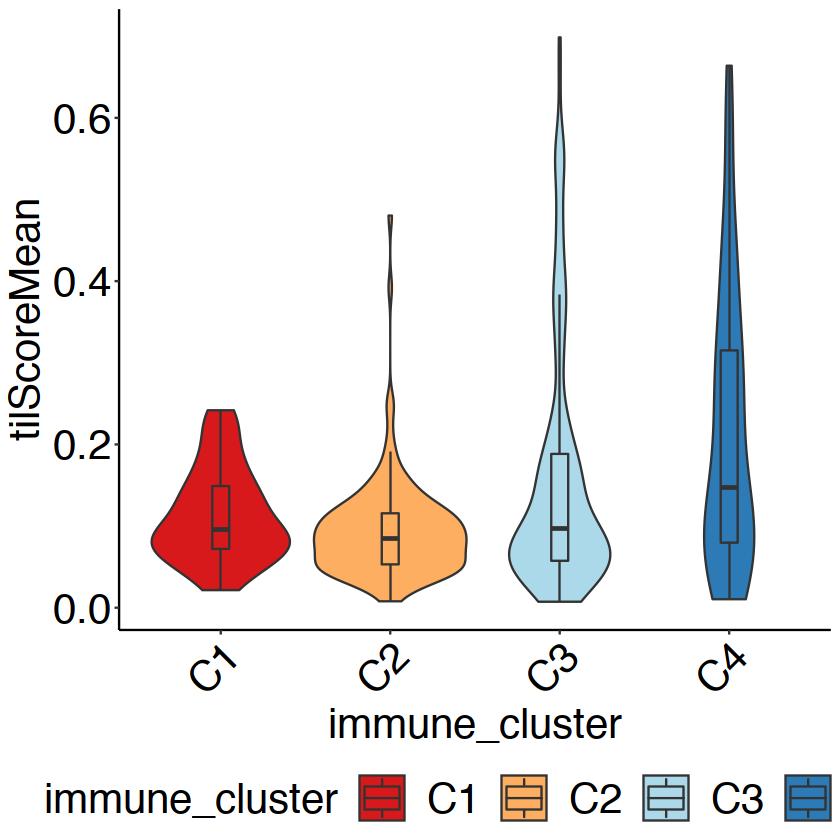

In [26]:
heplot <- ggplot(data = HE_manifest, 
                 aes(x = immune_cluster, y = tilScoreMean, fill = immune_cluster)) + 
geom_violin() + geom_boxplot(width = 0.1, outlier.colour = NA) + myaxis + myplot +
scale_fill_manual(values = cluster_col) +
theme(legend.position = "bottom") 
heplot 

In [27]:
pdf(paste0(plotpath, "HE_vs_immuneclusters.pdf"),
   width = 10, height = 12)

print(heplot)

dev.off()

pdf 
  2

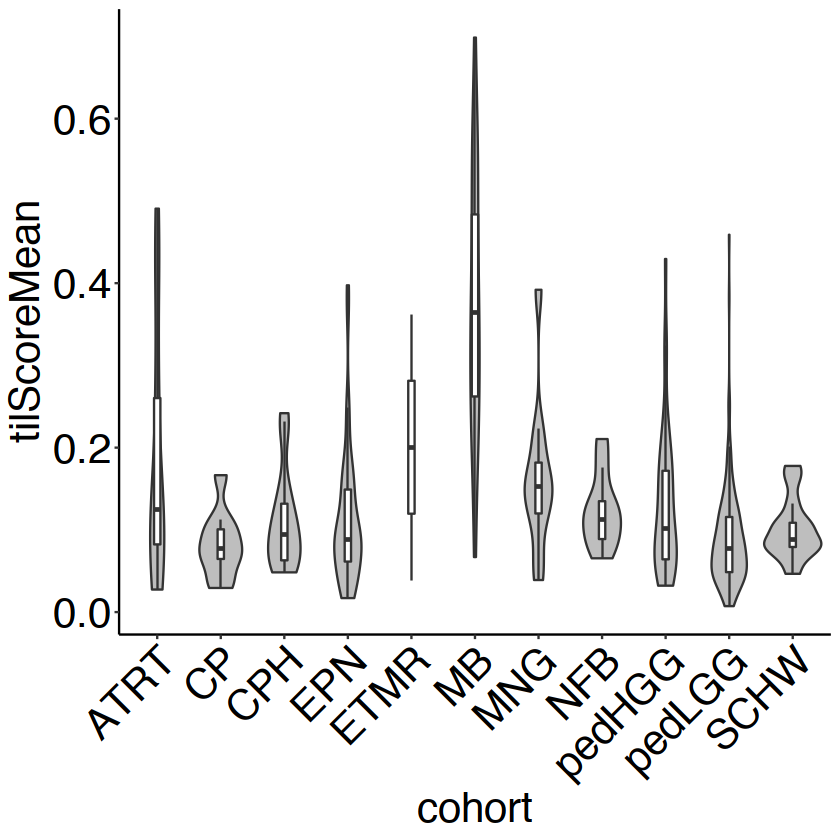

In [28]:
heplot <- ggplot(data = HE_manifest, aes(x = cohort, y = tilScoreMean)) + 
geom_violin(fill = "gray") + geom_boxplot(width = 0.1, outlier.colour = NA) + myaxis + myplot +
theme(legend.position = "bottom") 
heplot 

In [29]:
pdf(paste0("~/Downloads/", "HE_vs_cancers.pdf"),
   width = 12, height = 10)

print(heplot)

dev.off()

pdf 
  2